In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Setup and Data Cleaning

In [ ]:
import os
import pickle
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/Final_project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['moonboard_problems_setup_2016.json', 'moonboard_problems_cleaned.csv', 'final_project_254']


In [ ]:
def font_to_v(grade):
    if grade == "4":
        return 0
    elif grade == "5":
        return 1
    elif grade == "5+":
        return 2
    elif grade == "6A" or grade == "6A+":
        return 3
    elif grade == "6B" or grade == "6B+":
        return 4
    elif grade == "6C":
        return 5
    elif grade == "6C+" or grade == "7A":
        return 6
    elif grade == "7A+":
        return 7
    elif grade == "7B" or grade == "7B+":
        return 8
    elif grade == "7C":
        return 9
    elif grade == "7C+":
        return 10
    elif grade == "8A":
        return 11
    elif grade == "8A+":
        return 12
    elif grade == "8B":
        return 13
    elif grade == "8B+":
        return 14
    elif grade == "8C":
        return 15
    elif grade == "8C+":
        return 16
    elif grade == "9A":
        return 17
    return -1

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
climbing_df = pd.read_json(GOOGLE_DRIVE_PATH + '/moonboard_problems_setup_2016.json').transpose()
climbing_data = climbing_df[['Grade', 'Moves']].copy()
display(climbing_data)
climb_data = {'Grade': [], 'Climb': []}
for climb_row in climbing_data.itertuples():
    climb_matrix = np.zeros((18, 11))
    for move in climb_row.Moves:
        col = ord(move['Description'][0].lower()) - 96
        row = (int)(move['Description'][1:])
        climb_matrix[row - 1][col - 1] = 1
    climb_data['Grade'].append(font_to_v(climb_row.Grade))
    climb_data['Climb'].append(climb_matrix.flatten())
climbing_ml_data = pd.DataFrame(climb_data)
display(climbing_ml_data)

,Grade,Moves
341208,8A+,"[{'Id': 1910055, 'Description': 'K18', 'IsStar..."
341206,6B+,"[{'Id': 1910040, 'Description': 'F5', 'IsStart..."
341205,6B+,"[{'Id': 1910030, 'Description': 'F5', 'IsStart..."
341204,6B+,"[{'Id': 1910021, 'Description': 'F5', 'IsStart..."
341199,6C,"[{'Id': 1909973, 'Description': 'F5', 'IsStart..."
...,...,...
19219,7A,"[{'Id': 1518030, 'Description': 'C5', 'IsStart..."
19218,7A,"[{'Id': 1844764, 'Description': 'B10', 'IsStar..."
19217,6B+,"[{'Id': 1518015, 'Description': 'F5', 'IsStart..."
19216,6B+,"[{'Id': 1518007, 'Description': 'F5', 'IsStart..."


,Grade,Climb
0,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
25902,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
25903,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
25904,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
25905,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Climb should in the form of a 18 x 11 matrix


In [ ]:
climb_df = pd.DataFrame(climbing_ml_data['Climb'].to_list())
climb_df['Grade'] = climbing_ml_data['Grade']

In [ ]:
climb_df

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,Grade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
25903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
25904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
25905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
def accuracy_within_one(y_test, y_predict):
  numCorrect = 0
  for i in range(y_test.size):
    #if off by 1 or less, mark it as correct
    if(abs(y_test - y_predict) <= 1):
      numCorrect +=1
  return numCorrect/test.size
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

In [ ]:
with open(GOOGLE_DRIVE_PATH + '/' + 'moonGen_scrape_2016_final', 'rb') as f:
  MoonBoard_2016_raw = pickle.load(f)
len(MoonBoard_2016_raw)

FileNotFoundError: ignored

# Visualization

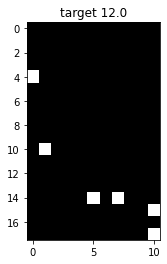

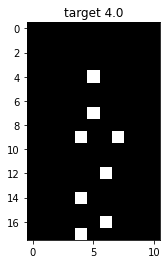

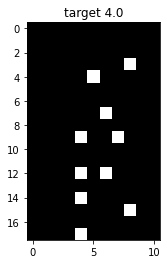

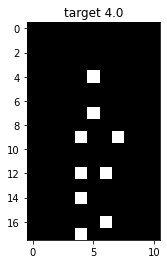

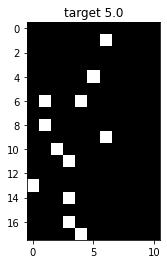

In [ ]:
for i in range(5):
    X = climb_df.loc[i][0:198]
    arr_X = X.values.reshape((18,11))
    target = climb_df.loc[i]['Grade']
    plt.imshow(arr_X, cmap= 'gray')
    plt.title('target ' + str(target))
    plt.show()

Let's look at the distribution of classes in our data

Text(0.5, 1.0, 'Frequency of Grades')

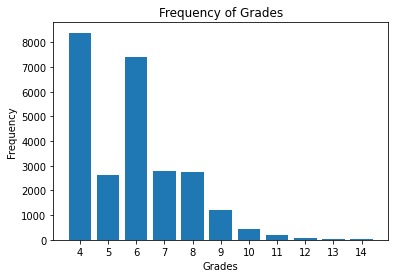

In [ ]:
climb_counts = climb_df.groupby(['Grade']).count()
climb_counts = climb_counts.iloc[:,0]
plt.bar(x=np.arange(4,15), height=climb_counts,  tick_label=np.arange(4,15))
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Frequency of Grades')

We can see that the data is heavily skewed.

Let's attemp to reduce the dimensions to 2 to see if we see any patterns whatsoever

In [ ]:
X = climb_df.iloc[:,:-1]
n_components = 2
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

(25907, 198)
(25907, 2)


In [ ]:
X_pca_df = pd.DataFrame(X_pca)
extracted_grades = climb_df['Grade']
X_pca_df = X_pca_df.join(extracted_grades)
X_pca_df

,0,1,Grade
0,-0.663637,0.149220,12
1,1.635333,-0.218547,4
2,1.905856,-0.069247,4
3,1.723450,-0.257500,4
4,0.575162,-0.777649,5
...,...,...,...
25902,-0.591046,-0.367232,6
25903,-0.475958,-0.245488,6
25904,0.718283,0.206249,4
25905,1.130811,-0.034722,4


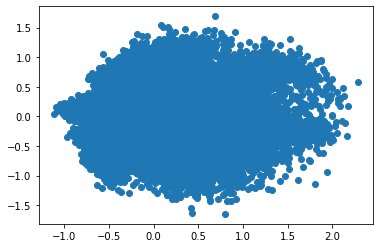

In [ ]:
plt.scatter(x = X_pca[:,0], y= X_pca[:,1])

In [ ]:
df = X_pca_df[X_pca_df['Grade'] == 4]
df

,0,1,Grade
1,1.635333,-0.218547,4
2,1.905856,-0.069247,4
3,1.723450,-0.257500,4
5,-0.028842,1.094671,4
8,0.236137,-1.256388,4
...,...,...,...
25874,0.310866,0.778492,4
25877,0.434398,-0.155852,4
25904,0.718283,0.206249,4
25905,1.130811,-0.034722,4


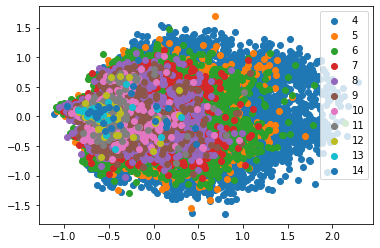

In [ ]:
fig, ax = plt.subplots()

for grade in np.arange(4,15):
  df = X_pca_df[X_pca_df['Grade'] == grade]
  ax.scatter(x=df.iloc[:,0], y=df.iloc[:,1], label=grade)
ax.legend()
plt.show()

Very busy and overlapping in 2D (not really surprising)

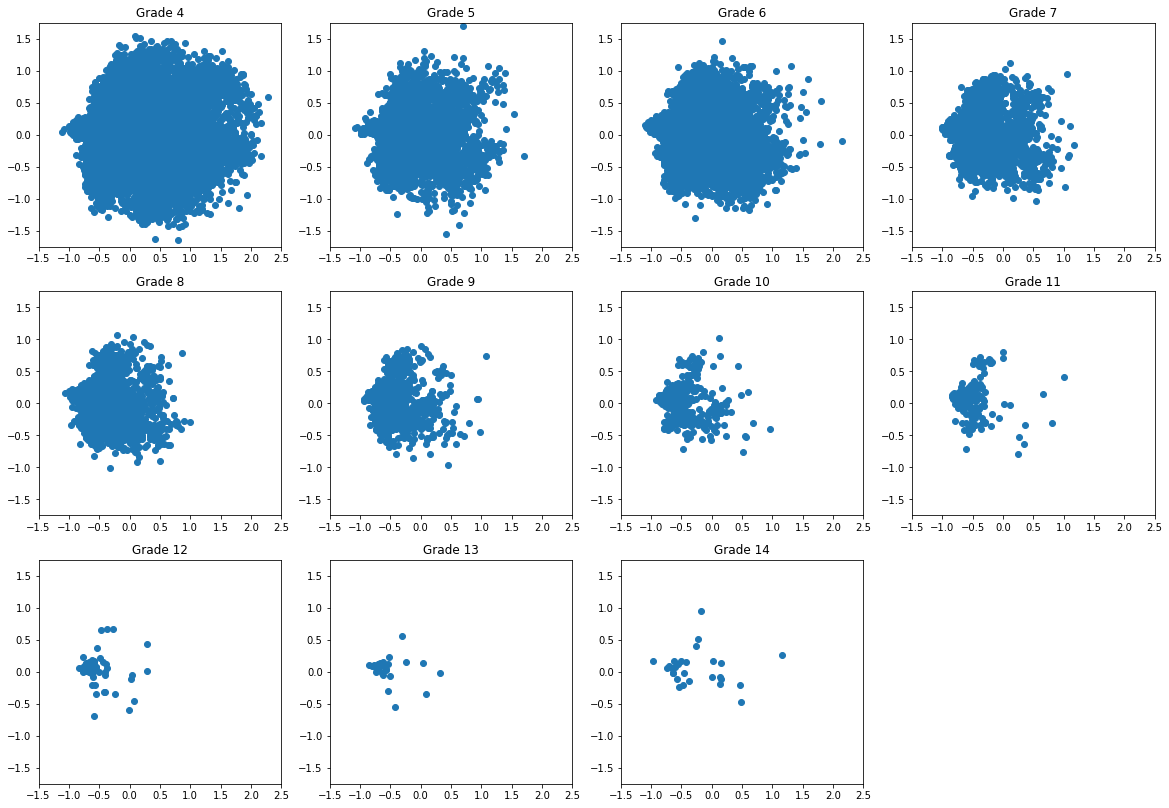

In [ ]:
rows = 3
columns = 4
fig = plt.figure(figsize=(20,14))

for grade in np.arange(4,15):
  plt.subplot(rows,columns, grade-3)
  df = X_pca_df[X_pca_df['Grade'] == grade]
  plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1] )
  plt.title("Grade " + str(grade))
  plt.xlim([-1.5,2.5])
  plt.ylim([-1.75,1.75])
plt.show()

# Decision Trees and Random Forests


In [ ]:
train , test = train_test_split(climb_df, test_size=0.25,random_state=0)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (19430, 198) y: (19430,)
Testing x: (6477, 198) y: (6477,)


In [ ]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

dec_tree.score(x_test, y_test)

0.37193144974525244

In [ ]:
scores = []
for i in range(1, x_train.shape[1]): # Max features
    dec_tree = DecisionTreeClassifier(max_features=i)
    dec_tree.fit(x_train, y_train)
    scores.append(dec_tree.score(x_test,y_test))
scores

[0.33719314497452524,
 0.3311718388142659,
 0.33981781689053575,
 0.3532499614018836,
 0.35170603674540685,
 0.3425968812721939,
 0.3459935155164428,
 0.3478462251042149,
 0.34954454222633935,
 0.35170603674540685,
 0.36050640728732436,
 0.34691987031032884,
 0.36143276208121045,
 0.3663733209819361,
 0.3563378107148371,
 0.36050640728732436,
 0.36174154701250577,
 0.35942566002779064,
 0.35077968195152076,
 0.364983788791107,
 0.36220472440944884,
 0.3756368689207967,
 0.36405743399722096,
 0.3648293963254593,
 0.3662189285162884,
 0.3747105141269106,
 0.3566465956461325,
 0.3532499614018836,
 0.37038752508877565,
 0.3666821059132314,
 0.37131387988266173,
 0.3768720086459781,
 0.36930677782924193,
 0.3761000463177397,
 0.3742473367299676,
 0.3672996757758221,
 0.3657557511193454,
 0.36390304153157327,
 0.3669908908445268,
 0.37100509495136635,
 0.37162266481395706,
 0.3791878956306932,
 0.36050640728732436,
 0.3668364983788791,
 0.38551798672224796,
 0.3748649065925583,
 0.3700787401

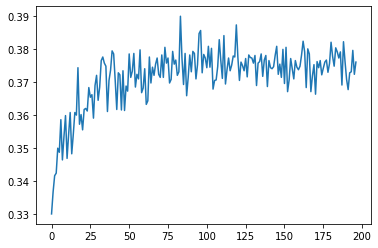

In [ ]:
plt.plot(scores)

Chose around 60 max features, though with how sparse the holds are I can;t imagine this is ideal.

In [ ]:
dec_tree = DecisionTreeClassifier(max_features=60)
dec_tree.fit(x_train, y_train)
dec_tree.score(x_test,y_test)

0.37440172919561526

Random Forest Approach

In [ ]:
climb_df

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,Grade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
25903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
25904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
25905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
def lower_grade(grade):
  if grade >= 0 and grade < 3:
      return 0
  elif grade >=3 and grade < 6:
      return 1
  elif grade >= 6 and grade <=9:
      return 2
  elif grade > 9:
  return 3

IndentationError: ignored

In [ ]:
climb_df['Condensed Grade'] = climb_df['Grade'].transform(lambda x: lower_grade(x))

In [ ]:
climb_condensed_df = climb_df.drop(columns=['Grade'])

In [ ]:
train , test = train_test_split(climb_condensed_df, test_size=0.25)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

dec_tree.score(x_test, y_test)

0.6853481550100355

Random Forest

In [ ]:
n = 50
rand_for = RandomForestClassifier(n_estimators=n)
rand_for.fit(x_train, y_train)

rand_for.score(x_test, y_test)

0.7628531727651691

Random forest for full range of grades

In [ ]:
train , test = train_test_split(climb_df, test_size=0.25)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

n = 50
rand_for = RandomForestClassifier(n_estimators=n)
rand_for.fit(x_train, y_train)

rand_for.score(x_test, y_test)

0.4673459935155164

In [ ]:
y_predict = rand_for.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix_to_df(conf_matrix, range(4,15))

,4,5,6,7,8,9,10,11,12,13,14
4,1578,36,430,17,23,6,0,0,0,0,0
5,268,32,312,7,8,2,0,0,0,0,0
6,472,47,1121,83,130,9,0,1,0,0,0
7,57,12,428,96,102,16,2,2,0,0,0
8,46,4,364,76,164,38,3,1,0,0,0
9,9,1,138,23,91,28,1,1,0,0,0
10,3,3,42,4,39,7,7,3,0,0,0
11,1,0,13,5,29,6,3,1,0,0,0
12,0,0,5,1,7,2,0,0,0,1,0
13,0,0,0,0,5,0,0,0,0,0,0


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           4       0.65      0.76      0.70      2090
           5       0.24      0.05      0.08       629
           6       0.39      0.60      0.48      1863
           7       0.31      0.13      0.19       715
           8       0.27      0.24      0.25       696
           9       0.24      0.10      0.14       292
          10       0.44      0.06      0.11       108
          11       0.11      0.02      0.03        58
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5

    accuracy                           0.47      6477
   macro avg       0.24      0.18      0.18      6477
weighted avg       0.43      0.47      0.43      6477



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
climb_df['Grade'].min()

4

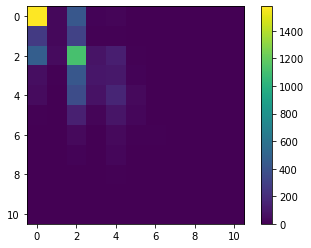

In [ ]:
ax = plt.subplot()
im = ax.imshow(conf_matrix)
plt.colorbar(im)
plt.show()

In [ ]:
def lower_to_nine(grade):
  if grade >= 9:
    return 9
  else:
    return int(grade)

In [ ]:
climb_df_2 = climb_df.copy()
climb_df_2['Grade'] = climb_df['Grade'].transform(lambda x: lower_to_nine(x))

In [ ]:
climb_df_2

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,Grade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
25903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
25904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
25905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
train , test = train_test_split(climb_df_2, test_size=0.25)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

n = 50
rand_for = RandomForestClassifier(n_estimators=n)
rand_for.fit(x_train, y_train)

rand_for.score(x_test, y_test)

0.47058823529411764

In [ ]:
y_predict = rand_for.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix_to_df(conf_matrix, range(4,10))

,4,5,6,7,8,9
4,1540,51,438,14,18,13
5,273,28,331,14,14,4
6,445,53,1118,88,90,48
7,64,15,422,76,97,57
8,43,4,390,51,129,100
9,16,2,158,38,78,157


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           4       0.65      0.74      0.69      2074
           5       0.18      0.04      0.07       664
           6       0.39      0.61      0.48      1842
           7       0.27      0.10      0.15       731
           8       0.30      0.18      0.23       717
           9       0.41      0.35      0.38       449

    accuracy                           0.47      6477
   macro avg       0.37      0.34      0.33      6477
weighted avg       0.43      0.47      0.43      6477



# SVM


In [ ]:
from sklearn import svm

In [ ]:
# Helpful to group higher grade climbs
def lower_to_nine(grade):
  if grade >= 9:
    return 9
  else:
    return int(grade)

In [ ]:
# Apply the flattening of the higher grade climbs
climb_df_flattened = climb_df.copy()
climb_df_flattened['Grade'] = climb_df_flattened['Grade'].transform(lambda x: lower_to_nine(x))

In [ ]:
# Break the data into a testing set and training set
train , test = train_test_split(climb_df_flattened, test_size=0.25)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]


In [ ]:
# Trying SVR Support vector regression
reg = svm.SVR()
reg.fit(X=x_train, y=y_train)

reg.score(X=x_test, y=y_test)

KeyboardInterrupt: ignored

Took about 2 minutes of computation however inital result is a bit higher than
random forest!

In [ ]:
# Trying SVR Support vector regression with more regularization
C=2
reg = svm.SVR(C=C)
reg.fit(X=x_train, y=y_train)

reg.score(X=x_test, y=y_test)

0.5692169609780159

Regularization

C = 2.0 : 0.563324173839054

C=1.1 : 0.5663584463933398

C=1 : 0.5663402406367537

C=0.9 : 0.5661510408832938

C=0.5 : 0.5630852256249703

# Neural Network


In [ ]:
train , test = train_test_split(climb_df, test_size=0.25)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
mlpClassifier = MLPClassifier(max_iter=5000, early_stopping=True).fit(x_train, y_train)
mlpClassifier.score(X=x_test, y=y_test)


0.48309402501157944

In [ ]:
y_predict = mlpClassifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix_to_df(conf_matrix, range(4,15))

,4,5,6,7,8,9,10,11,12,13,14
4,1546,3,541,5,23,6,0,0,0,0,0
5,252,2,360,2,15,0,0,0,0,0,0
6,410,2,1272,23,129,19,0,0,0,0,0
7,33,0,467,16,147,17,2,0,0,0,0
8,10,0,390,23,258,33,0,0,0,0,0
9,2,0,106,12,138,35,0,0,0,0,0
10,0,0,24,9,50,16,0,0,0,0,0
11,1,0,5,4,30,14,0,0,0,0,0
12,0,0,0,0,6,3,0,0,0,0,0
13,0,0,0,0,5,1,0,0,0,0,0


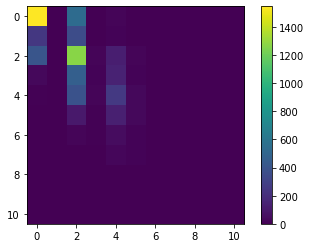

In [ ]:
ax = plt.subplot()
im = ax.imshow(conf_matrix)
plt.colorbar(im)
plt.show()
#These results really arent that great maybe I set up the model wrong or it has a really high variance
#Adding Early Stopping improved the results greatly

In [ ]:
print(classification_report(y_test, y_predict))
#The algorithms always tend to undergrade problems I wonder if we can bias higher graded results?

              precision    recall  f1-score   support

           4       0.69      0.73      0.71      2124
           5       0.29      0.00      0.01       631
           6       0.40      0.69      0.51      1855
           7       0.17      0.02      0.04       682
           8       0.32      0.36      0.34       714
           9       0.24      0.12      0.16       293
          10       0.00      0.00      0.00        99
          11       0.00      0.00      0.00        54
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        10

    accuracy                           0.48      6477
   macro avg       0.19      0.17      0.16      6477
weighted avg       0.43      0.48      0.43      6477



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
